<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-Datasets" data-toc-modified-id="Reading-Datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading Datasets</a></span></li><li><span><a href="#Running-the-Experiment" data-toc-modified-id="Running-the-Experiment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Running the Experiment</a></span><ul class="toc-item"><li><span><a href="#Set-the-signal_strength_parmeters" data-toc-modified-id="Set-the-signal_strength_parmeters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Set the signal_strength_parmeters</a></span></li><li><span><a href="#Set-the-Experiment-parameters" data-toc-modified-id="Set-the-Experiment-parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Set the Experiment parameters</a></span></li><li><span><a href="#Plot-Simulation-map" data-toc-modified-id="Plot-Simulation-map-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot Simulation map</a></span></li><li><span><a href="#Run-the-Simulation-Experiment" data-toc-modified-id="Run-the-Simulation-Experiment-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Run the Simulation Experiment</a></span></li><li><span><a href="#Retrieve-the-handover-Dataset" data-toc-modified-id="Retrieve-the-handover-Dataset-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Retrieve the handover Dataset</a></span></li></ul></li><li><span><a href="#Machine-Learning-tasks" data-toc-modified-id="Machine-Learning-tasks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning tasks</a></span><ul class="toc-item"><li><span><a href="#Experiment_1" data-toc-modified-id="Experiment_1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Experiment_1</a></span></li><li><span><a href="#Experiment_2" data-toc-modified-id="Experiment_2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Experiment_2</a></span></li></ul></li></ul></div>

# Reading Datasets

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
from glob import glob
buoy_data_lst = glob('Buoy_data/*.csv')

# add one more dataset to reach 61 datasets, where '15' below is any random dataset.
buoy_data_lst.append(buoy_data_lst[15])
print('Number of datasets:', len(buoy_data_lst))

Number of datasets: 61


# Running the Experiment

## Set the signal_strength_parmeters

In [6]:
# Equation_8 in the paper 
signal_strength_parms_dic = {   'lambda':0.125 ,
                                'p_t':5  ,
                                'g_t':1  ,
                                'g_r':1  ,
                            }

## Set the Experiment parameters

In [7]:
from utils.UN_simulator.Simulation import Simulation
from utils.UN_simulator.positions import buoys_centers

exp = Simulation(
                    num_sensors_per_buoy=10,
                    num_buoys= len(buoys_centers),
                    buoys_radius = 0.1,
                    sleep = 0.1,
                    simulation_period = -1,
                    x_lim=(-0.5, 1.5),
                    y_lim=(-0.5, 1.5),
                    plt_text = False,
                    real_time_tracking = False,
                    buoys_data = buoy_data_lst ,
                    scaling_coef =0.0001,
                    show_plt_axis = False,
                    signal_strength_parms_dic=signal_strength_parms_dic,
                    dump_initial_simulation_experiment=0
                 )

..........................
Initialization_time:1.64 Seconds


## Plot Simulation map

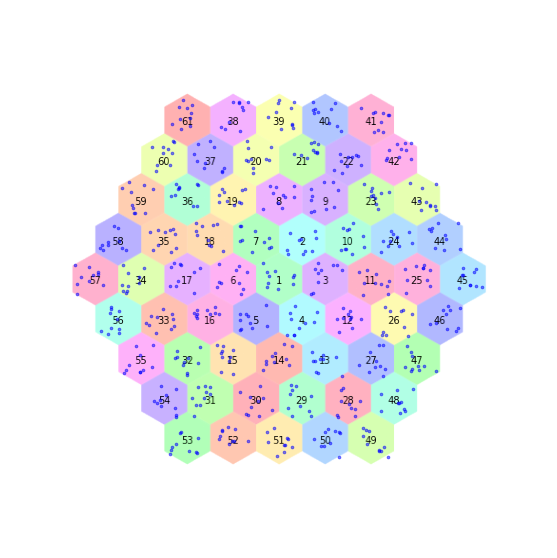

In [8]:
exp.plot_Simulation_map()

## Run the Simulation Experiment

In [6]:
exp.run(tracking=None, 
        sleep=None, 
        plt_text=False, 
        signal_strength_parms_dic=None)

## Retrieve the handover Dataset

In [ ]:
df = exp.get_handover_df(dump=True)

# Machine Learning tasks

In [ ]:
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Experiment_1

In [ ]:
from utils.ML_utils.Cross_Validation import kfold
w = df[['UW_speed', 'UW_direction', 'Sig_1','Sig_2', 'Sig_3', 'Sig_4', 'Sig_5', 'Sig_6','y']].copy()
y = w.pop('y')

from catboost import CatBoostClassifier
abc = CatBoostClassifier(verbose=0, n_estimators=100,loss_function='MultiClass')
dff = kfold(abc, w, y, n_splits=10, round_=4, save_plot='1')

In [ ]:
for model,par in [
                (KNeighborsClassifier(), {"n_neighbors":2}), # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
                (GaussianNB(), {}),  # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
                (DecisionTreeClassifier(), {}), # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
                (CatBoostClassifier(), {'verbose':0, 'n_estimators':100,'loss_function':'MultiClass'})
           ]:
    print( 'model = ' , model, par )
    clf = model
    if len(par.keys())>0:
        clf.set_params(**par)
    hold_out_validation(clf, x, y, 'train_test_pkl.pkl', round_=4, save_plot=exp_type)
    kfold_validation(clf, x, y, n_splits=10, round_=4, save_plot=exp_type)

## Experiment_2

In [ ]:
for model,par in [
                (KNeighborsClassifier(), {"n_neighbors":2}), # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
                (GaussianNB(), {}),  # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
                (DecisionTreeClassifier(), {}), # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
                (CatBoostClassifier(), {'verbose':0, 'n_estimators':100,'loss_function':'MultiClass'})
               ]:
    print( 'model = ' , model, par )
    clf = model
    if len(par.keys())>0:
        clf.set_params(**par)
    hold_out_validation(clf, x, y, 'train_test_pkl.pkl', round_=4, save_plot=exp_type)
    kfold_validation(clf, x, y, n_splits=10, round_=4, save_plot=exp_type)